In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('datadata.txt')

In [3]:
df

,X,y
0,1,2
1,2,4
2,3,6
3,4,8


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### overfitting (ridge)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mean_squared_log_error, max_error

In [7]:
linear_model = LinearRegression()

In [8]:
linear_model.fit(X, y)

LinearRegression()

In [9]:
y_predict_1 = linear_model.predict(X)

In [10]:
y_predict_1

array([2., 4., 6., 8.])

In [11]:
import matplotlib.pyplot as plt

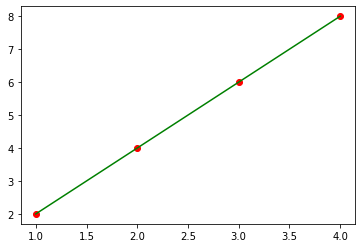

In [12]:
plt.scatter(X, y, color='red');
plt.plot(X.values, y_predict_1, color='green');

In [13]:
from sklearn.linear_model import Ridge

In [14]:
alpha = 0
ridge_model = Ridge(alpha= alpha)

In [15]:
ridge_model.fit(X, y)

Ridge(alpha=0)

In [16]:
y_predict_2 = ridge_model.predict(X)

In [17]:
y_predict_2

array([2., 4., 6., 8.])

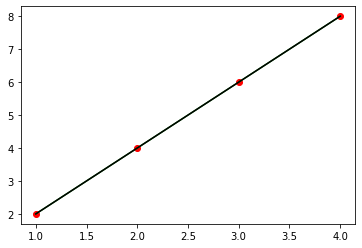

In [18]:
plt.scatter(X, y, color='red');
plt.plot(X.values, y_predict_1, color='green');
plt.plot(X.values, y_predict_2, color='k');

In [19]:
mse = mean_squared_error(y, y_predict_1)
rmse = mean_squared_error(y, y_predict_1, squared=False)
mae = mean_absolute_error(y, y_predict_1)
acc = r2_score(y, y_predict_1)
evs = explained_variance_score(y, y_predict_1)
msle = mean_squared_log_error(y, y_predict_1)
max_err = max_error(y, y_predict_1)

C:\Users\scs\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### overfitting trade off (ridge)

In [20]:
alpha = 1
ridge_model_trade_off = Ridge(alpha= alpha)

In [21]:
ridge_model_trade_off.fit(X, y)

Ridge(alpha=1)

In [22]:
y_predict_3 = ridge_model_trade_off.predict(X)

In [23]:
y_predict_3

array([2.5       , 4.16666667, 5.83333333, 7.5       ])

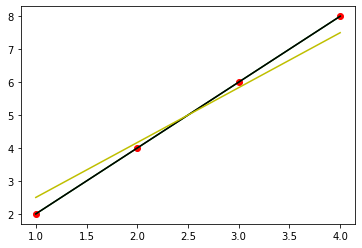

In [24]:
plt.scatter(X, y, color='red');
plt.plot(X.values, y_predict_1, color='green');
plt.plot(X.values, y_predict_2, color='k');
plt.plot(X.values, y_predict_3, color='y');

In [25]:
alpha = 0.4
ridge_model_trade_off_3 = Ridge(alpha= alpha)

In [26]:
ridge_model_trade_off_3.fit(X, y)
y_predict_4 = ridge_model_trade_off.predict(X)

In [27]:
y_predict_4

array([2.5       , 4.16666667, 5.83333333, 7.5       ])

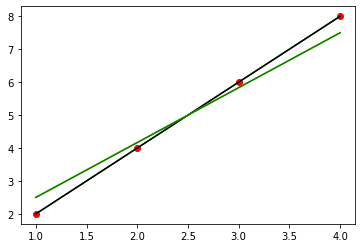

In [28]:
plt.scatter(X, y, color='red');
plt.plot(X.values, y_predict_1, color='green');
plt.plot(X.values, y_predict_2, color='k');
plt.plot(X.values, y_predict_3, color='y');
plt.plot(X.values, y_predict_4, color='g');

### overfitting (lasso)

In [29]:
from sklearn.linear_model import Lasso

In [30]:
alpha = 0
lasso_model = Lasso(alpha= alpha)

In [31]:
lasso_model.fit(X, y)
y_predict_5 = lasso_model.predict(X)

C:\Users\scs\anaconda3\lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\scs\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


In [32]:
y_predict_5

array([2., 4., 6., 8.])

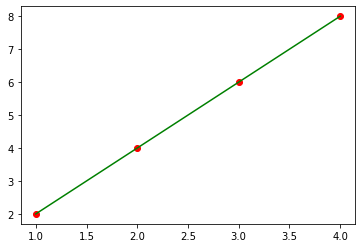

In [33]:
plt.scatter(X, y, color='red');
plt.plot(X.values, y_predict_5, color='green');

### overfitting trade off (lasso)

In [34]:
alpha = 0.5
lasso_model = Lasso(alpha= alpha)

In [35]:
lasso_model.fit(X, y)

Lasso(alpha=0.5)

In [36]:
y_predict_6 = lasso_model.predict(X)

In [37]:
y_predict_6

array([2.6, 4.2, 5.8, 7.4])

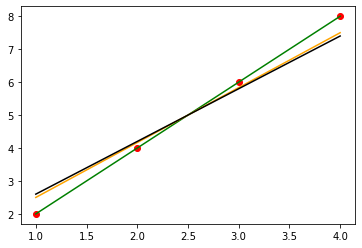

In [38]:
plt.scatter(X, y, color='red');
plt.plot(X.values, y_predict_5, color='green'); #linear
plt.plot(X.values, y_predict_4, color='orange'); #ridge
plt.plot(X.values, y_predict_6, color='k'); #lasso

In [39]:
def calculate_metrics(y_true, y_predicts, algorithms):
    for algo, y_pred in zip(algorithms, y_predicts):
        mse = mean_squared_error(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        evs = explained_variance_score(y_true, y_pred)
        msle = mean_squared_log_error(y_true, y_pred)
        max_err = max_error(y_true, y_pred)
        metrics_list.append([algo, mse, rmse, mae, r2, evs, msle, max_err])

In [40]:
y_predicts = [y_predict_1, y_predict_2, y_predict_3, y_predict_4, y_predict_5, y_predict_6]

In [41]:
algorithms = ['Linear_regression', 'Ridge_without_alpha', 'Ridge_with_alpha_1', 
              'Ridge_with_alpha_0.5', 'Lasso_without_alpha', 'Lasso_with_alpha_0.5']

In [42]:
metrics_list = []

In [43]:
calculate_metrics(y, y_predicts, algorithms)
metrics_df = pd.DataFrame(metrics_list, columns=["Algorithm", "MSE", "RMSE", "MAE", "R-squared", "Explained Variance", "MSLE", "Max Error"])

C:\Users\scs\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\scs\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\scs\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\scs\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function

In [44]:
metrics_df

,Algorithm,MSE,RMSE,MAE,R-squared,Explained Variance,MSLE,Max Error
0,Linear_regression,1.183291e-30,1.087792e-15,8.881784e-16,1.000000,1.000000,6.162976e-32,1.776357e-15
1,Ridge_without_alpha,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000e+00,0.000000e+00
2,Ridge_with_alpha_1,1.388889e-01,3.726780e-01,3.333333e-01,0.972222,0.972222,7.171345e-03,5.000000e-01
3,Ridge_with_alpha_0.5,1.388889e-01,3.726780e-01,3.333333e-01,0.972222,0.972222,7.171345e-03,5.000000e-01
4,Lasso_without_alpha,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000e+00,0.000000e+00
5,Lasso_with_alpha_0.5,2.000000e-01,4.472136e-01,4.000000e-01,0.960000,0.960000,1.009493e-02,6.000000e-01
